<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/DeepLearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#现代卷积神经网络
> * AlexNet。它是第⼀个在⼤规模视觉竞赛中击败传统计算机视觉模型的⼤型神经⽹络；
* 使⽤重复块的⽹络（VGG）。它利⽤许多重复的神经⽹络块；
* ⽹络中的⽹络（NiN）。它重复使⽤由卷积层和1 × 1 卷积层（⽤来代替全连接层）来构建深层⽹络;
* 含并⾏连结的⽹络（GoogLeNet）。它使⽤并⾏连结的⽹络，通过不同窗口⼤小的卷积层和最⼤汇聚层来并⾏抽取信息；
* 残差⽹络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流⾏的体系结构；
* 稠密连接⽹络（DenseNet）。它的计算成本很⾼，但给我们带来了更好的效果。

## AlexNet
> ⾸次证明了学习到的特征可以超越⼿⼯设计的特征,AlexNet和LeNet的架构⾮常相似,这里给出他们的对比图，左为LeNet:

![AlexNet](http://pan.anderd.com/download/6152e8da7015ee003ff4fce3)


### 模型设计
&emsp;&emsp;在AlexNet的第⼀层，卷积窗口的形状是 11×11。由于ImageNet中⼤多数图像的宽和⾼⽐MNIST图像的多10倍以上，因此，需要⼀个更⼤的卷积窗口来捕获⽬标。第⼆层中的卷积窗口形状被缩减为 5×5，然后是 3×3。此外，在第⼀层、第⼆层和第五层卷积层之后，加⼊窗口形状为 3×3、步幅为2的最⼤汇聚层。而且，AlexNet的卷积通道数⽬是LeNet的10倍。在最后⼀个卷积层后有两个全连接层，分别有4096个输出。

### 激活函数
&emsp;&emsp;AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。⼀⽅⾯，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。另⼀⽅⾯，当使⽤不同的参数初始化⽅法时，ReLU激活函数使训练模型更加容易。当sigmoid激活函数的输出⾮常接近于0或1时，这些区域的梯度⼏乎为0，因此反向传播**⽆法继续更新⼀些模型参数**。相反，ReLU激活函数在正区间的梯度总是1。因此，**如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到⼏乎为0的梯度，从而使模型⽆法得到有效的训练**。

### 容量处理和预处理
&emsp;&emsp;AlexNet通过dropout控制全连接层的模型复杂度，而LeNet只使⽤了权重衰减。为了进⼀步扩充数据，AlexNet在训练时增加了⼤量的图像增强数据，如翻转、裁切和变⾊。这使得模型更健壮，更⼤的样本量有效地减少了过拟合。

### AlexNet和LeNet的复杂度对比

![复杂度](http://pan.anderd.com/download/6152f843064718003f35d225)


In [ ]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [ ]:
#实现
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    #这里我们用11*11的窗口来捕捉对象，步幅为4，以减少输出的高度和宽度。输出通道也比LeNet变大了好多。
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    #改用最大池化层
    nn.MaxPool2d(kernel_size=3,stride=2),
    #减少卷积窗口，使用填充为2，来使得输入和输出的高和宽一致。让后增大输出通道
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #使用三个连续的卷积层和较小的卷积窗口，除了最后的卷积层，输出通道的数量进一步增加。
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    #这里，全连接层的输出数量是LeNet中的好几倍，使用dropout层来减轻过度拟合
    nn.Linear(6400,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    #输出层，由于我们用Fashion-MNIST，所以类别数为10。
    nn.Linear(4096,10))

In [ ]:
#构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状
X = torch.randn(1,1,224,224)
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'OutPut shape: \t',X.shape)

Conv2d OutPut shape: 	 torch.Size([1, 96, 54, 54])
ReLU OutPut shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d OutPut shape: 	 torch.Size([1, 96, 26, 26])
Conv2d OutPut shape: 	 torch.Size([1, 256, 26, 26])
ReLU OutPut shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 5, 5])
Flatten OutPut shape: 	 torch.Size([1, 6400])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut sh

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#获取数据集，还是用Fashion-MNIST数据集，但有一个问题是图像分辨率，这里我们用resize参数来调整。使之适合AlexNet。
batch_size = 128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

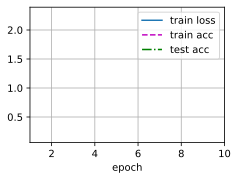

In [ ]:
lr,num_epochs = 0.01, 10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## VGG（使用块的网络）
&emsp;&emsp;经典卷积神经⽹络的基本组成部分是下⾯的这个序列：
* 带填充以保持分辨率的卷积层；
* ⾮线性激活函数，如ReLU；
* 汇聚层，如最⼤汇聚层。

&emsp;&emsp;而⼀个 VGG 块与之类似，由⼀系列卷积层组成，后⾯再加上⽤于空间下采样的最⼤汇聚层。





In [ ]:
#VGG块，函数有三个参数，分别对应于卷积层的数量 num_convs、
#输⼊通道的数量 in_channels 和输出通道的数量 out_channels
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs,in_channels,out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
    layers.append(nn.ReLU())
    in_channels = out_channels
  layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
  return nn.Sequential(*layers)

### VGG网络
&emsp;&emsp;与 AlexNet、LeNet ⼀样，VGG ⽹络可以分为两部分：第⼀部分主要由卷积层和汇聚层(多个VGG块)组成，第⼆部分由全连接层组成。如图所示。

![VGG](http://pan.anderd.com/download/6153bdf117cc83003f5e3387)

&emsp;&emsp;原始VGG⽹络有5个卷积块，其中前两个块各有⼀个卷积层，后三个块各包含两个卷积层。第⼀个模块有64个输出通道，每个后续模块将输出通道数量翻倍，直到该数字达到512。由于该⽹络使⽤8个卷积层和3个全连接层，因此它通常被称为VGG-11。

In [ ]:
#实现VGG-11,通过在conv_arch上执行for循环来实现

conv_arch = ((1,64,),(1,128),(2,256),(2,512),(2,512))

def vgg(conv_arch):
  conv_blks = []
  in_channels = 1
  #卷积层部分
  for (num_convs,out_channels) in conv_arch:
    conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
    in_channels = out_channels

  return nn.Sequential(
      *conv_blks,nn.Flatten(),
      #全连接层
      nn.Linear(out_channels * 7 * 7,4096),nn.ReLU(),nn.Dropout(0.5),
      nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.5),
      nn.Linear(4096,10))

net = vgg(conv_arch)

In [ ]:
#构建一个高宽为224的单通道数据样本，来观察每层的输出形状
X = torch.randn((1,1,224,224))
for blk in net:
  X = blk(X)
  print(blk.__class__.__name__,'output shape:\t',X.shape)
#结果看出，每个块的高度的宽度减半，最终都是7，最后在展平表示，送入全连接层处理。

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
#训练模型，仍然用Fashin-MNIST
ratio = 4
small_conv_arch = [(pair[0],pair[1] // ratio)for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.172, train acc 0.936, test acc 0.922
379.7 examples/sec on cuda:0


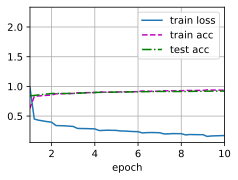

In [ ]:
lr, num_epochs,batch_size = 0.05,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## NIN(网络中的网络)
&emsp;&emsp;LeNet、AlexNet和VGG都有⼀个共同的设计模式：
* 通过⼀系列的卷积层与汇聚层来提取空间结构特征；
* 然后通过全连接层对特征的表征进⾏处理。

&emsp;&emsp;AlexNet和VGG对LeNet的改进主要在于如何扩⼤和加深这两个模块。**⽹络中的⽹络(NiN)**提供了⼀个⾮常简单的解决⽅案：在每个像素的通道上分别使⽤多层感知机。
### NIN块
&emsp;&emsp;卷积层的输⼊和输出由四维张量组成，张量的每个轴分别对应样本、通道、⾼度和宽度。另外，全连接层的输⼊和输出通常是分别对应于样本和特征的⼆维张量。NiN的想法是在**每个像素位置**（针对每个⾼度和宽度）应⽤⼀个全连接层。
如果我们将权重连接到每个空间位置，我们可以将其视为**1×1卷积层**，或作为在每个像素位置上独⽴作⽤的全连接层。从另⼀个⻆度看，即将空间维度中的每个像素视为单个样本，将通道维度视为不同特征（feature）。下图是VGG和NIN的差异。

![NIN](http://pan.anderd.com/download/6153d6c3ea9096003f591ae0)

> &emsp;&emsp;NiN块以⼀个普通卷积层开始，后⾯是两个1×1的卷积层。这两个1×1卷积层充当带有ReLU激活函数的逐像素全连接层。第⼀层的卷积窗口形状通常由⽤户设置。随后的卷积窗口形状固定为1×1。



In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def nin_block(in_channels,out_channels,kernel_size,strides,padding):#一个卷积层两个1x1的卷积层代替全链接层
  return nn.Sequential(
      nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
      nn.ReLU(),
      nn.Conv2d(out_channels,out_channels,kernel_size=1,),nn.ReLU(),
      nn.Conv2d(out_channels,out_channels,kernel_size=1,),nn.ReLU())

In [ ]:
#NiN模型
net = nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),#全局平均汇聚层（global average pooling layer），⽣成⼀个多元逻辑向量（logits）？？？？
    # 将四维的输出转成⼆维的输出，其形状为(批量⼤⼩, 10)
    nn.Flatten())

In [ ]:
#创建⼀个数据样本来查看每个块的输出形状。
X = torch.rand(size=(1,1,224,224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__, 'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.591, train acc 0.800, test acc 0.805
452.4 examples/sec on cuda:0


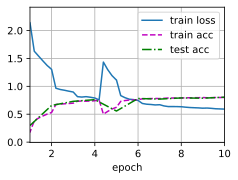

In [ ]:
lr,num_epochs,batch_size = 0.1,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

###小结
* NiN使⽤由⼀个卷积层和多个 1 × 1 卷积层组成的块。该块可以在卷积神经⽹络中使⽤，以允许更多的
每像素⾮线性。
* NiN去除了容易造成过拟合的全连接层，将它们替换为全局平均汇聚层（即在所有位置上进⾏求和）。该汇聚层通道数量为所需的输出数量（例如，Fashion-MNIST的输出为10）。
* 移除全连接层可减少过拟合，同时显著减少NiN的参数。
* NiN的设计影响了许多后续卷积神经⽹络的设计。
